## Simple example of TuRBO-m

In [1]:
cd ..

/home/mattyshen/NNTuRBO


In [2]:
from nnturbo import NNTurboM
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt

## Set up an optimization problem class

In [3]:
class Levy:
    def __init__(self, dim=10):
        self.dim = dim
        self.lb = -5 * np.ones(dim)
        self.ub = 10 * np.ones(dim)
        
    def __call__(self, x):
        assert len(x) == self.dim
        assert x.ndim == 1
        assert np.all(x <= self.ub) and np.all(x >= self.lb)
        w = 1 + (x - 1.0) / 4.0
        val = np.sin(np.pi * w[0]) ** 2 + \
            np.sum((w[1:self.dim - 1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[1:self.dim - 1] + 1) ** 2)) + \
            (w[self.dim - 1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[self.dim - 1])**2)
        return val

f = Levy(10)

## Create a Turbo optimizer instance

In [4]:
turbo_m = NNTurboM(
    f=f,  # Handle to objective function
    lb=f.lb,  # Numpy array specifying lower bounds
    ub=f.ub,  # Numpy array specifying upper bounds
    n_init=10,  # Number of initial bounds from an Symmetric Latin hypercube design
    max_evals=1000,  # Maximum number of evaluations
    n_trust_regions=5,  # Number of trust regions
    batch_size=10,  # How large batch size TuRBO uses
    verbose=True,  # Print information from each batch
    use_ard=True,  # Set to true if you want to use ARD for the GP kernel
    max_cholesky_size=2000,  # When we switch from Cholesky to Lanczos
    n_training_steps=50,  # Number of steps of ADAM to learn the hypers
    min_cuda=1024,  # Run on the CPU for small datasets
    device="cpu",  # "cpu" or "cuda"
    dtype="float64",  # float64 or float32
    prop=1.2,
    p=2
)

Using dtype = torch.float64 
Using device = cpu


# Run the optimization process

In [5]:
turbo_m.optimize()

TR-0 starting from: 25.59
TR-1 starting from: 19.51
TR-2 starting from: 28.9
TR-3 starting from: 22.72
TR-4 starting from: 35.85
k: 100
k: 100
k: 100
k: 100
k: 100
50) New best @ TR-3: 18.59
k: 100
k: 100
k: 100
k: 100
k: 100
k: 100
k: 100
k: 100
k: 100
k: 100
70) New best @ TR-1: 17.56
70) New best @ TR-3: 18.46
k: 100
k: 100
k: 100
k: 100
k: 100
k: 83
k: 100
k: 100
k: 100
k: 100
90) New best @ TR-2: 16.1
90) New best @ TR-3: 9.438
k: 83
k: 100
k: 100
k: 100
k: 100
100) New best @ TR-3: 6.666
k: 83
k: 100
k: 100
k: 100
k: 100
110) New best @ TR-3: 6.362
k: 83
k: 100
k: 100
k: 120
k: 100
k: 83
k: 100
k: 100
k: 120
k: 100
k: 83
k: 100
k: 100
k: 100
k: 100
k: 83
k: 100
k: 100
k: 100
k: 100
k: 83
k: 100
k: 100
k: 83
k: 100
k: 83
k: 100
k: 100
k: 83
k: 100
k: 83
k: 100
k: 100
k: 83
k: 100
k: 69
k: 100
k: 100
k: 69
k: 100
190) New best @ TR-0: 3.359
190) New best @ TR-3: 6.255
k: 69
k: 100
k: 100
k: 69
k: 100
k: 69
k: 83
k: 100
k: 69
k: 100
k: 57
k: 83
k: 100
k: 69
k: 100
k: 57
k: 83
k: 100

## Extract all evaluations from Turbo and print the best

In [6]:
X = turbo_m.X  # Evaluated points
fX = turbo_m.fX  # Observed values
ind_best = np.argmin(fX)
f_best, x_best = fX[ind_best], X[ind_best, :]

print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))

Best value found:
	f(x) = 0.356
Observed at:
	x = [-2.791  0.82   0.874  0.805  0.784  0.643 -0.135  0.333  0.583  0.802]


## Plot the progress

TuRBO-5 converges to a solution close to the global optimum

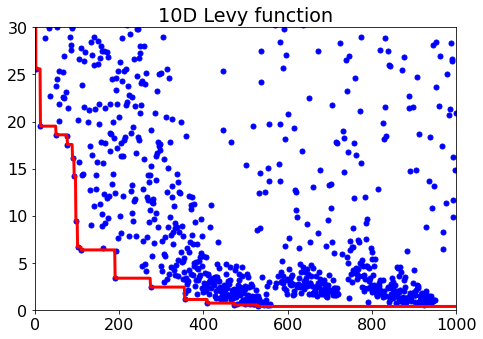

In [20]:
fig = plt.figure(figsize=(7, 5))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(fX, 'b.', ms=10)  # Plot all evaluated points as blue dots
plt.plot(np.minimum.accumulate(fX), 'r', lw=3)  # Plot cumulative minimum as a red line
plt.xlim([0, len(fX)])
plt.ylim([0, 30])
plt.title("10D Levy function")

plt.tight_layout()
plt.show()